<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Работа-линейных-моделей" data-toc-modified-id="Работа-линейных-моделей-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Работа линейных моделей</a></span><ul class="toc-item"><li><span><a href="#Без-масштабирования" data-toc-modified-id="Без-масштабирования-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Без масштабирования</a></span></li><li><span><a href="#С-масштабированием" data-toc-modified-id="С-масштабированием-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>С масштабированием</a></span></li><li><span><a href="#Наличие-корреляции-в-обучающих-данных" data-toc-modified-id="Наличие-корреляции-в-обучающих-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Наличие корреляции в обучающих данных</a></span><ul class="toc-item"><li><span><a href="#df.corr()" data-toc-modified-id="df.corr()-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>df.corr()</a></span></li><li><span><a href="#Phik" data-toc-modified-id="Phik-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Phik</a></span></li><li><span><a href="#Коэффициент-инфляции-дисперсии-(VIF)" data-toc-modified-id="Коэффициент-инфляции-дисперсии-(VIF)-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Коэффициент инфляции дисперсии (VIF)</a></span></li><li><span><a href="#Mutual-Information" data-toc-modified-id="Mutual-Information-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Mutual Information</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import random
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams, rcParamsDefault

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score, mean_squared_error

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.datasets import make_circles, make_classification, make_regression

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve


In [2]:
def show_coef(names, coef, positive=False):
    tmp_df = pd.Series(index=names, data=coef).sort_values(ascending=False)
    if positive:
        sns.barplot(x=abs(tmp_df.values), y=tmp_df.index)
    else:
        sns.barplot(x=tmp_df.values, y=tmp_df.index)
    plt.tight_layout
    plt.show()
    

In [3]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
pd.options.mode.chained_assignment = None

rcParams['figure.figsize'] = 6,6
%config InlineBackend.figure_format = 'svg' 
%matplotlib inline
factor = 1
default_dpi = rcParamsDefault['figure.dpi']
rcParams['figure.dpi'] = default_dpi*factor

# Работа линейных моделей

In [4]:
df = sns.load_dataset('mpg')
df = df.dropna()
df = df.drop(columns=['origin', 'name', 'model_year','cylinders' ])
df.head()

,mpg,displacement,horsepower,weight,acceleration
0,18.00,307.00,130.00,3504,12.00
1,15.00,350.00,165.00,3693,11.50
2,18.00,318.00,150.00,3436,11.00
3,16.00,304.00,150.00,3433,12.00
4,17.00,302.00,140.00,3449,10.50


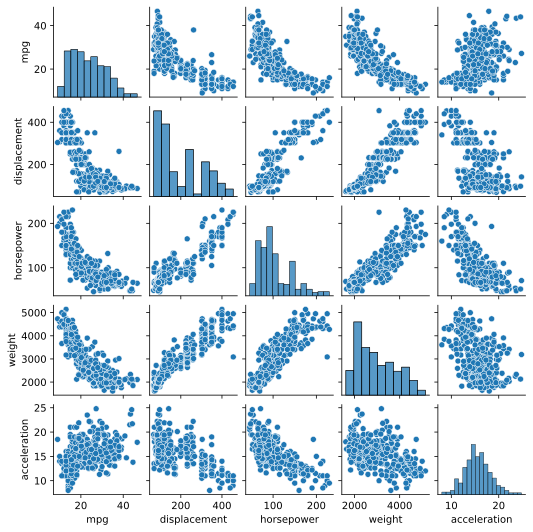

In [5]:
_ = sns.pairplot(df, height=1.5)

In [6]:
df.describe()

,mpg,displacement,horsepower,weight,acceleration
count,392.00,392.00,392.00,392.00,392.00
mean,23.45,194.41,104.47,2977.58,15.54
std,7.81,104.64,38.49,849.40,2.76
min,9.00,68.00,46.00,1613.00,8.00
25%,17.00,105.00,75.00,2225.25,13.78
50%,22.75,151.00,93.50,2803.50,15.50
75%,29.00,275.75,126.00,3614.75,17.02
max,46.60,455.00,230.00,5140.00,24.80


In [7]:
X = df.drop(columns='mpg')
y = df.mpg
feature_names = X.columns.tolist()

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

## Без масштабирования

In [8]:
model = LinearRegression()
model.fit(train_X, train_y)

preds = model.predict(test_X)
model.intercept_, model.coef_

(46.42111226825273,
 array([-0.00935113, -0.04847209, -0.00502316, -0.05942766]))

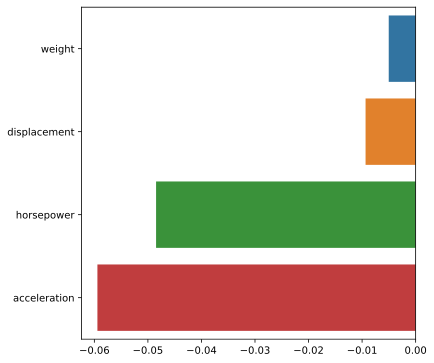

In [9]:
show_coef(feature_names, model.coef_)

In [10]:
preds = model.predict(test_X)
print(f'MAE = {mean_absolute_error(test_y, preds):.2f}')
print(f'RMSE = {mean_squared_error(test_y, preds, squared=False):.2f}')

MAE = 3.51
RMSE = 4.25


## С масштабированием

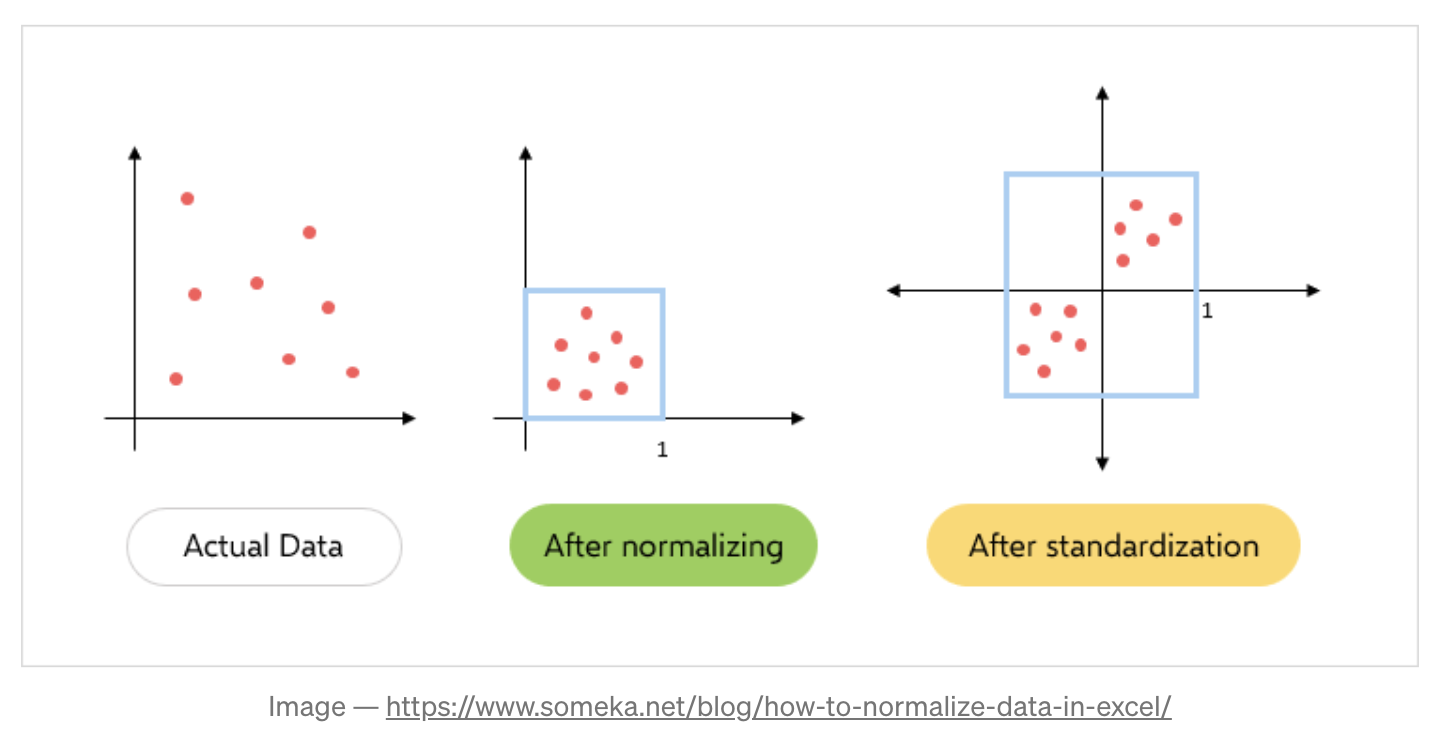

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaler = scaler.fit(train_X)

In [12]:
scaler.mean_, scaler.var_, scaler.scale_


(array([ 195.51757188,  104.5942492 , 2986.12460064,   15.54408946]),
 array([1.07330995e+04, 1.46095677e+03, 7.05245930e+05, 7.91498903e+00]),
 array([103.60067341,  38.22246423, 839.7892177 ,   2.81335903]))

In [13]:
train_X_scaled = scaler.transform(train_X)
test_X_scaled = scaler.transform(test_X)

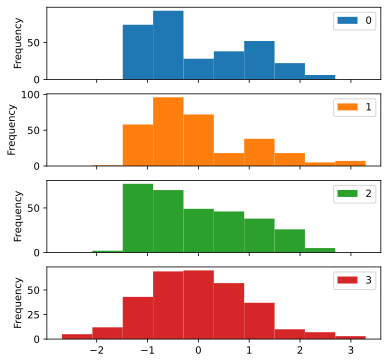

In [14]:
_ = pd.DataFrame(train_X_scaled).plot(kind='hist', subplots=True )

In [15]:
model = LinearRegression()
model.fit(train_X_scaled, train_y)

preds = model.predict(test_X_scaled)
model.intercept_, model.coef_

(23.599361022364217,
 array([-0.96878361, -1.85272274, -4.21839788, -0.16719135]))

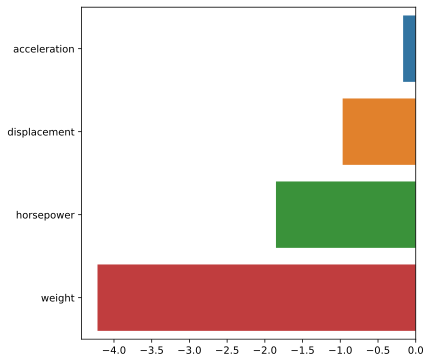

In [16]:
show_coef(feature_names, model.coef_)

In [17]:
print(f'MAE = {mean_absolute_error(test_y, preds):.2f}')
print(f'RMSE = {mean_squared_error(test_y, preds, squared=False):.2f}')

MAE = 3.51
RMSE = 4.25


## Наличие корреляции в обучающих данных

In [18]:
df['weight_t'] = df['weight']/1000

X = df.drop(columns=['mpg'])
y = df.mpg
feature_names = X.columns.tolist()

df.head()

,mpg,displacement,horsepower,weight,acceleration,weight_t
0,18.00,307.00,130.00,3504,12.00,3.50
1,15.00,350.00,165.00,3693,11.50,3.69
2,18.00,318.00,150.00,3436,11.00,3.44
3,16.00,304.00,150.00,3433,12.00,3.43
4,17.00,302.00,140.00,3449,10.50,3.45


### df.corr()

In [19]:
df.corr()

,mpg,displacement,horsepower,weight,acceleration,weight_t
mpg,1.00,-0.81,-0.78,-0.83,0.42,-0.83
displacement,-0.81,1.00,0.90,0.93,-0.54,0.93
horsepower,-0.78,0.90,1.00,0.86,-0.69,0.86
weight,-0.83,0.93,0.86,1.00,-0.42,1.00
acceleration,0.42,-0.54,-0.69,-0.42,1.00,-0.42
weight_t,-0.83,0.93,0.86,1.00,-0.42,1.00


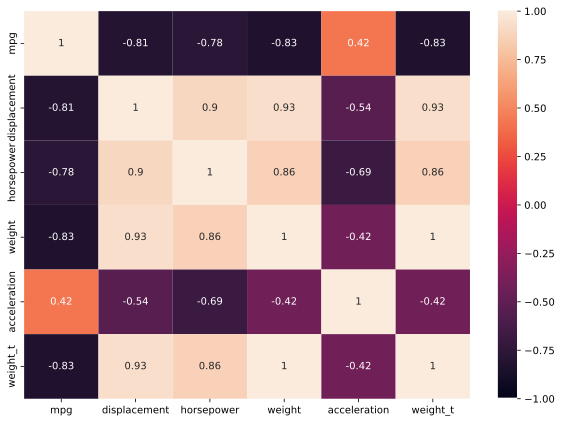

In [20]:
fig, ax = plt.subplots(figsize=(10, 7))
_ = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, ax=ax)

In [21]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler = scaler.fit(train_X)
train_X_scaled = scaler.transform(train_X)
test_X_scaled = scaler.transform(test_X)

In [22]:
model = LinearRegression()
model.fit(train_X_scaled, train_y)

preds = model.predict(test_X_scaled)
print(f'MAE = {mean_absolute_error(test_y, preds):.2f}')

MAE = 3.51


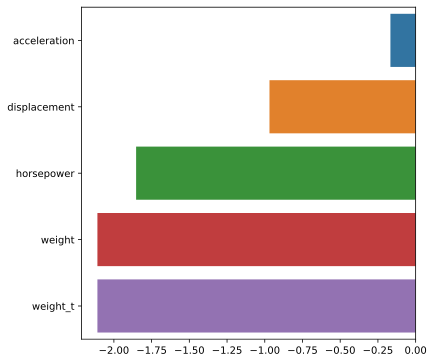

In [23]:
show_coef(feature_names, model.coef_)

### Phik

In [24]:
# !pip install phik

In [25]:
# матрица корреляции признаков

from phik.report import correlation_report, plot_correlation_matrix

interval_cols = df.select_dtypes('number').columns.tolist()
phik_overview = df.phik_matrix(interval_cols=interval_cols)

In [26]:
df.phik_matrix(interval_cols=interval_cols)

,mpg,displacement,horsepower,weight,acceleration,weight_t
mpg,1.00,0.81,0.81,0.83,0.62,0.83
displacement,0.81,1.00,0.92,0.89,0.71,0.89
horsepower,0.81,0.92,1.00,0.83,0.75,0.83
weight,0.83,0.89,0.83,1.00,0.51,1.00
acceleration,0.62,0.71,0.75,0.51,1.00,0.51
weight_t,0.83,0.89,0.83,1.00,0.51,1.00


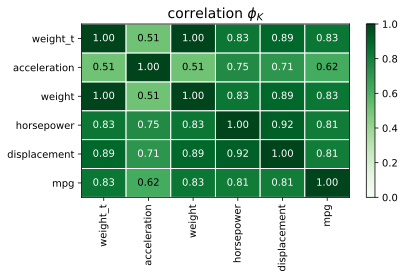

In [27]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1, 
                        figsize=(6, 4))
plt.tight_layout()

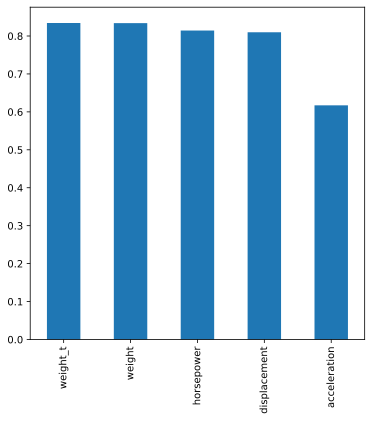

In [28]:
_ = phik_overview['mpg'].sort_values(ascending=False)[1:].plot(kind='bar')

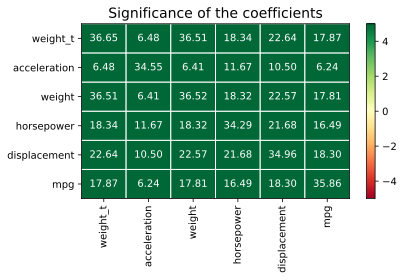

In [29]:
# статистическая значимость зависимостей

significance_overview = df.significance_matrix(interval_cols=interval_cols)
plot_correlation_matrix(significance_overview.fillna(0).values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                        vmin=-5, vmax=5, title="Significance of the coefficients", 
                        usetex=False, fontsize_factor=1, figsize=(6, 4))
plt.tight_layout()

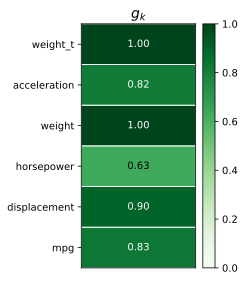

In [30]:
# глобальный коэффициент корреляции

global_correlation, global_labels = df.global_phik(interval_cols=interval_cols)

plot_correlation_matrix(global_correlation, 
                        x_labels=[''], y_labels=global_labels, 
                        vmin=0, vmax=1, figsize=(3.5,4),
                        color_map="Greens", title=r"$g_k$",
                        fontsize_factor=1)
plt.tight_layout()

Отличная статья про использование Phik - https://towardsdatascience.com/phik-k-get-familiar-with-the-latest-correlation-coefficient-9ba0032b37e7

### Коэффициент инфляции дисперсии (VIF)

**Коэффициент инфляции дисперсии (VIF)** – это мера степени  мультиколлинеарности  в наборе множественных  регрессионных  переменных.  Высокий (>5) VIF указывает на то, что ассоциированная независимая переменная сильно коллинеарна другим переменным в модели.

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

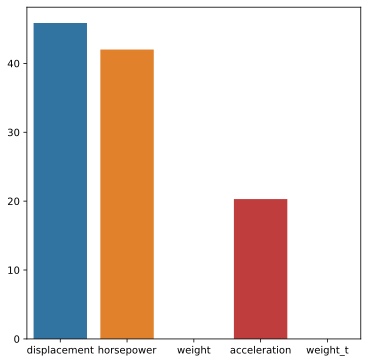

In [32]:
vif = [variance_inflation_factor(X, i) for i in range(len(X.columns))]
_ = sns.barplot(x=X.columns.tolist(), y=vif)

In [33]:
vif

[45.8655942608709, 42.01519337024783, inf, 20.304705092289847, inf]

Что такое VIF - https://nesrakonk.ru/variance-inflation-factor/

### Mutual Information

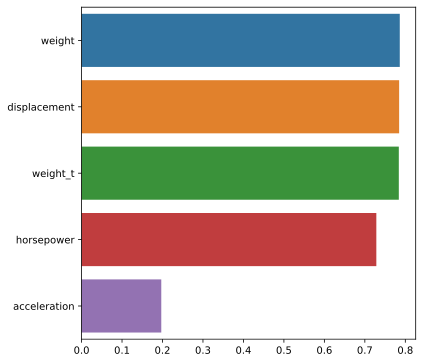

In [34]:
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

X = df.drop(columns=['mpg'])
y = df.mpg
feature_names = X.columns.tolist()

mi = mutual_info_regression(X, y, random_state=42)
show_coef(feature_names, mi)